In [1]:
%matplotlib inline
# Imports 
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout,MaxPooling2D
from keras.layers import Conv2D
from tensorflow.keras.utils import to_categorical,plot_model
from keras import Input , Model
import matplotlib.pyplot as plt

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Make input daat from 0 to 1
x_train = x_train.reshape(60000,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(10000,28,28,1).astype("float32") / 255.0

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


def FUNC_CNN(input_shape):
  inputs = Input(shape = input_shape , name = 'Digit image')
  x = Conv2D(32, kernel_size = (3,3) , activation = 'relu')(inputs)
  x = Conv2D(64, kernel_size = (3,3) , activation = 'relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.2)(x)
  x = Flatten()(x)
  x = Dense(64, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  outputs = Dense(10, activation = 'softmax')(x)

  model = Model(inputs=inputs, outputs=outputs , name='mnist_cnn_model')
  plot_model(model, 'mnist_cnn_model.png', show_shapes=True)
  model.compile(loss = 'categorical_crossentropy', optimizer= 'rmsprop',metrics =['acc' , 'mse'])
  return model


def train(model):
  with tf.device('/device:GPU:0'):
      history = model.fit(x_train,y_train ,
                          batch_size = 64,
                          epochs = 10,
                          verbose = 1,
                          validation_split = 0.2)
            
  return history.history

In [3]:
model = FUNC_CNN(input_shape = (28,28,1))
history = train(model)

Epoch 1/10
750/750 [==============================] - 42s 16ms/step - loss: 0.2943 - acc: 0.9107 - mse: 0.0131 - val_loss: 0.0726 - val_acc: 0.9790 - val_mse: 0.0032
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1202 - acc: 0.9654 - mse: 0.0053 - val_loss: 0.0559 - val_acc: 0.9829 - val_mse: 0.0026
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0967 - acc: 0.9728 - mse: 0.0043 - val_loss: 0.0496 - val_acc: 0.9859 - val_mse: 0.0022
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0861 - acc: 0.9755 - mse: 0.0039 - val_loss: 0.0550 - val_acc: 0.9847 - val_mse: 0.0024
Epoch 5/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0869 - acc: 0.9760 - mse: 0.0038 - val_loss: 0.0567 - val_acc: 0.9855 - val_mse: 0.0024
Epoch 6/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0879 - acc: 0.9755 - mse: 0.0039 - val_loss: 0.0644 - val_acc: 0.9850 - val_mse: 0.0024
Epoc

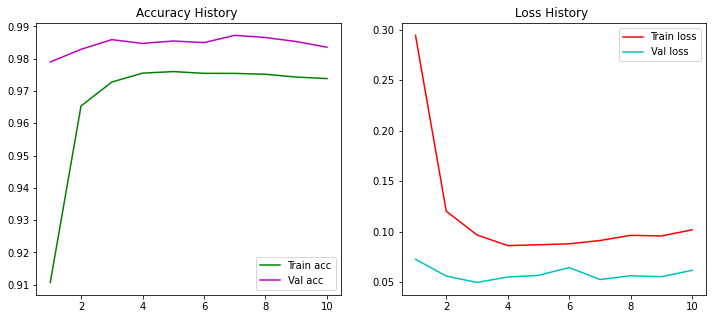

In [4]:
def plots(epochs , history):
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches((12,5))
    ax[0].plot(epochs, history['acc'] , 'g' , label = 'Train acc')
    ax[0].plot(epochs, history['val_acc'],'m',label = 'Val acc')
    ax[0].set_title('Accuracy History ')
    ax[0].legend()

    ax[1].plot(epochs, history['loss'] , 'r',label = 'Train loss')
    ax[1].plot(epochs, history['val_loss'],'c',label = 'Val loss')
    ax[1].set_title('Loss History ')
    ax[1].legend()

    fig.show()


epochs = range(1,11)
plots(epochs,history)

In [5]:
acc = model.evaluate(x_test,y_test)
print(f' Test Score [Accuracy]: {acc[1]*100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0513 - acc: 0.9856 - mse: 0.0023
 Test Score [Accuracy]: 98.56%
